In [413]:
filtered

,기준연도,소재지,사업자등록번호,상호,수출규모(조회연도),이용여부,전년도수출규모,수출초보
0,2020,대구,5148191033,농업회사법인(주)영풍,500만~1천만,이용,100만~1천만,False
1,2020,경기,1138659005,(주)애즈포러스,10만미만,미이용,10만~100만,True
2,2020,경기,3148665871,주식회사 세영테크원,10만미만,미이용,10만미만,True
3,2020,충남,3128107021,한국스미더스오아시스(주),200만~500만,미이용,100만~1천만,False
4,2020,대구,5148188182,(주)씨디씨뉴매틱,1천만~2천만,이용,1천만~3천만,False
...,...,...,...,...,...,...,...,...
364626,2024,서울,7748102883,주식회사 강부라더스,500만~1천만,미이용,200만~300만,False
364627,2024,서울,7748600162,(주)유유엘앤피,500만~1천만,이용,1천만~2천만,False
364628,2024,인천,7748800962,주식회사 유니언글로벌,50만~70만,미이용,300만~500만,False
364629,2024,인천,7748801995,주)카트래이드,500만~1천만,미이용,1천만~2천만,False


In [409]:
filtered['전년도수출규모'] = filtered['전년도수출규모'].str.replace('-', '~')

In [405]:
filtered['수출규모(조회연도)'].value_counts()

수출규모(조회연도)
10만미만        157843
10만~100만      74809
100만~200만     26690
10만~30만       25706
200만~500만     14803
500만~1천만      12120
30만~50만       11595
1천만~2천만        7354
50만~70만        7038
70만~100만       6766
200만~300만      4878
5천만초과          4862
300만~500만      4779
2천만~3천만        2835
3천만~5천만        2553
Name: count, dtype: int64

In [410]:
filtered['전년도수출규모'].value_counts()

전년도수출규모
10만미만        153161
10만~100만     102291
100만~200만     21942
200만~500만     15089
10만~30만       12935
100만~1천만      12609
500만~1천만      10053
1천만~2천만        6266
30만~50만        5916
5천만초과          5038
50만~70만        3698
70만~100만       3505
3천만~5천만        2677
200만~300만      2582
300만~500만      2562
2천만~3천만        2409
1천만~3천만        1898
Name: count, dtype: int64

In [418]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 수출규모 순서 정의 (오름차순)
export_order = ['10만미만', '10만~30만', '30만~50만', '50만~70만', '70만~100만', '10만~100만', 
                '100만~200만', '200만~300만', '200만~500만', '300만~500만', '100만~1천만', 
                '500만~1천만', '1천만~2천만', '1천만~3천만', '2천만~3천만', '3천만~5천만', '5천만초과']

# 수출규모별, 기업분류별 통계 계산
export_comparison = filtered.groupby(['전년도수출규모', '수출초보']).agg({
    '이용여부': [
        lambda x: (x == '미이용').mean() * 100,  # 미이용률
        'count'  # 절대 개수
    ]
}).round(1)

export_comparison.columns = ['미이용률', '총기업수']
export_comparison = export_comparison.reset_index()
export_comparison['전체대비비중'] = (export_comparison['총기업수'] / len(filtered) * 100).round(1)

# 수출규모 순서대로 정렬
export_comparison['전년도수출규모'] = pd.Categorical(
    export_comparison['전년도수출규모'], 
    categories=export_order, 
    ordered=True
)
export_comparison = export_comparison.sort_values('전년도수출규모')

# 서브플롯으로 미이용률과 절대비중 함께 표시
fig2 = make_subplots(
    rows=1, cols=2,
    subplot_titles=('수출규모별 미이용률 (%)', '수출규모별 전체 대비 비중 (%)'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}]]
)

# 색상 정의
colors = {True: 'lightcoral', False: 'steelblue'}

# 미이용률 바차트 (수출초보기업 여부로 구분)
for is_novice in [True, False]:
    data = export_comparison[export_comparison['수출초보'] == is_novice]
    company_type = '수출초보기업' if is_novice else '수출성장기업'
    fig2.add_trace(
        go.Bar(
            x=data['전년도수출규모'],
            y=data['미이용률'],
            name=f'{company_type} 미이용률',
            marker_color=colors[is_novice],
            text=data['미이용률'].astype(str) + '%',
            textposition='outside',
            legendgroup=company_type
        ),
        row=1, col=1
    )

# 전체 대비 비중 바차트
for is_novice in [True, False]:
    data = export_comparison[export_comparison['수출초보'] == is_novice]
    company_type = '수출초보기업' if is_novice else '수출성장기업'
    fig2.add_trace(
        go.Bar(
            x=data['전년도수출규모'],
            y=data['전체대비비중'],
            name=f'{company_type} 비중',
            marker_color=colors[is_novice],
            text=data['전체대비비중'].astype(str) + '%',
            textposition='outside',
            showlegend=False,
            legendgroup=company_type
        ),
        row=1, col=2
    )

fig2.update_layout(
    title_text="수출규모별 미이용률 vs 절대적 비중 (초보기업 vs 수출성장기업)",
    height=500,
    width=1200,
    barmode='group'
)

fig2.update_xaxes(title_text="수출규모", row=1, col=1)
fig2.update_xaxes(title_text="수출규모", row=1, col=2)
fig2.update_yaxes(title_text="미이용률 (%)", row=1, col=1)
fig2.update_yaxes(title_text="전체 대비 비중 (%)", row=1, col=2)

fig2.show()

print("수출규모별 기업분류 통계:")
print(export_comparison)

수출규모별 기업분류 통계:
      전년도수출규모   수출초보  미이용률    총기업수  전체대비비중
4       10만미만   True  78.8  153161    42.0
3     10만~30만   True  44.8   12935     3.5
11    30만~50만   True  45.0    5916     1.6
14    50만~70만   True  42.8    3698     1.0
16   70만~100만   True  42.4    3505     1.0
2    10만~100만   True  74.1  102291    28.1
1   100만~200만  False  56.6   21942     6.0
7   200만~300만  False  34.3    2582     0.7
8   200만~500만  False  59.5   15089     4.1
10  300만~500만  False  52.3    2562     0.7
0    100만~1천만  False  63.4   12609     3.5
13   500만~1천만  False  57.7   10053     2.8
5     1천만~2천만  False  60.9    6266     1.7
6     1천만~3천만  False  61.8    1898     0.5
9     2천만~3천만  False  66.8    2409     0.7
12    3천만~5천만  False  70.3    2677     0.7
15      5천만초과  False  67.6    5038     1.4


## Library, Data import

In [320]:
import pandas as pd

df = pd.read_csv('data/이용현황.csv', encoding='cp949', index_col=0)
df.head(2)

,소재지,상호,공사이용여부,KED신용등급,수출규모(조회연도),사업자등록번호,매출액(백만원),업종명,업종코드,기준연도
0,부산,삼부테크,미이용,NaN,10만미만,3270600436,0,NaN,NaN,2020
1,서울,한국티피케이터치솔루션연락사무소,미이용,NaN,10만미만,1048407678,0,NaN,NaN,2020


In [ ]:
df.isna().mean() 

소재지           0.000002
상호            0.000000
공사이용여부        0.000000
KED신용등급       0.244609
수출규모(조회연도)    0.000000
사업자등록번호       0.000000
매출액(백만원)      0.000000
업종명           0.138905
업종코드          0.138905
기준연도          0.000000
dtype: float64

In [250]:
import pandas as pd

ds = pd.read_csv('data/인수내용.csv', encoding='cp949', index_col=0)
ds.head(2)

,기업규모,사업자등록번호,보험종목,보험세부종목,인수건수,원화보험금액,원화인수보험료,단체원화보험금액,유효계약건수,원화유효보험금액,유효계약보험료,기준연도,소재지
0,대기업,1148116585,수입보험,수입보험(금융기관용),13,3.377044e+11,103103440.0,0,4.0,1.170119e+11,40061360.0,2024,서울
1,대기업,1068124691,단기수출보험,단기수출보험(일반수출),"1,047",4.031830e+10,192943280.0,0,225.0,1.197737e+10,63341460.0,2024,서울


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490183 entries, 0 to 490182
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   소재지         490182 non-null  object 
 1   상호          490183 non-null  object 
 2   공사이용여부      490183 non-null  object 
 3   KED신용등급     370280 non-null  object 
 4   수출규모(조회연도)  490183 non-null  object 
 5   사업자등록번호     490183 non-null  int64  
 6   매출액(백만원)    490183 non-null  int64  
 7   업종명         422094 non-null  object 
 8   업종코드        422094 non-null  float64
 9   기준연도        490183 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 41.1+ MB


In [252]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145847 entries, 0 to 145846
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   기업규모      145793 non-null  object 
 1   사업자등록번호   145847 non-null  int64  
 2   보험종목      145847 non-null  object 
 3   보험세부종목    145847 non-null  object 
 4   인수건수      145847 non-null  object 
 5   원화보험금액    145847 non-null  float64
 6   원화인수보험료   145847 non-null  float64
 7   단체원화보험금액  145847 non-null  object 
 8   유효계약건수    122062 non-null  float64
 9   원화유효보험금액  145847 non-null  float64
 10  유효계약보험료   145847 non-null  float64
 11  기준연도      145847 non-null  int64  
 12  소재지       145847 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 15.6+ MB


In [322]:
df['key'] = list(zip(df['기준연도'], df['사업자등록번호']))
ds['key'] = list(zip(ds['기준연도'], ds['사업자등록번호']))

df['이용여부'] = df['key'].isin(ds['key']).map({True: '이용', False: '미이용'})

In [326]:
df['비교용'] = df['사업자등록번호'].isin(ds['사업자등록번호']).map({True: '이용', False: '미이용'})

In [323]:
df.head(3)

,소재지,상호,공사이용여부,KED신용등급,수출규모(조회연도),사업자등록번호,매출액(백만원),업종명,업종코드,기준연도,key,이용여부
0,부산,삼부테크,미이용,NaN,10만미만,3270600436,0,NaN,NaN,2020,"(2020, 3270600436)",미이용
1,서울,한국티피케이터치솔루션연락사무소,미이용,NaN,10만미만,1048407678,0,NaN,NaN,2020,"(2020, 1048407678)",미이용
2,대구,농업회사법인(주)영풍,이용,BB,500만~1천만,5148191033,19522,떡류 제조업,10711.0,2020,"(2020, 5148191033)",이용


In [327]:
df['비교용'].value_counts()

비교용
미이용    311862
이용     178321
Name: count, dtype: int64

In [324]:
df.rename(columns={'공사이용여부': '마케팅기준'}, inplace=True)
df['이용여부'].value_counts()

이용여부
미이용    374219
이용     115964
Name: count, dtype: int64

In [ ]:
# 마케팅 이용 기준일 때, 공사이용여부가 훨씬 많음 
# 인수실적이 더 정확함, 신용조사 의뢰라거나 contact이 있는 경우 수출자초보코드를 보유하게 되고 해당 내용이 기록됨
df['마케팅기준'].value_counts()

마케팅기준
미이용    300881
이용     189302
Name: count, dtype: int64

In [329]:
result = df.groupby(['기준연도', '소재지'])['이용여부'].value_counts().unstack()
result = result.reset_index()
result

이용여부,기준연도,소재지,미이용,이용
0,2020,강원,618,187
1,2020,경기,28092,4481
2,2020,경남,3670,891
3,2020,경북,1075,2196
4,2020,광주,716,159
...,...,...,...,...
80,2024,전남,708,382
81,2024,전북,421,841
82,2024,제주,250,89
83,2024,충남,2038,660


In [257]:
add = pd.read_csv('data/19ma.csv', encoding='cp949', index_col=0)

In [330]:
df1 = df[['기준연도', '소재지', '사업자등록번호', '상호', '수출규모(조회연도)', '이용여부']]

In [261]:
uu = add[['기준연도', '소재지', '사업자번호', '상호', '수출규모(조회연도)']]
uu.rename(columns={'사업자번호': '사업자등록번호'}, inplace=True)
uu['수출규모(조회연도)'] = uu['수출규모(조회연도)'].str.replace('U$', '')
uu['수출규모(조회연도)'] = uu['수출규모(조회연도)'].str.replace(r'(?<=\S)\s(?=\S)', '', regex=True)

C:\Users\wq240\AppData\Local\Temp\ipykernel_18128\2404770170.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\wq240\AppData\Local\Temp\ipykernel_18128\2404770170.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\wq240\AppData\Local\Temp\ipykernel_18128\2404770170.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [262]:
uu['수출규모(조회연도)'].value_counts()

수출규모(조회연도)
10만미만       52593
10만-100만    29159
100만-1천만    13078
1천만-3천만      1932
5천만초과         802
3천만-5천만       445
Name: count, dtype: int64

In [263]:
uu['이용여부'] = '미이용'
uu.head(1)

C:\Users\wq240\AppData\Local\Temp\ipykernel_18128\3605294592.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,기준연도,소재지,사업자등록번호,상호,수출규모(조회연도),이용여부
0,2019,대구,5148187937,건일공업주식회사,10만미만,미이용


In [331]:
df1.head(1)

,기준연도,소재지,사업자등록번호,상호,수출규모(조회연도),이용여부
0,2020,부산,3270600436,삼부테크,10만미만,미이용


In [332]:
u1 = pd.concat([uu, df1], ignore_index=True)
u1.sample(10)

,기준연도,소재지,사업자등록번호,상호,수출규모(조회연도),이용여부
409761,2023,대구,5038609936,앤우드,10만미만,미이용
540775,2024,서울,2128196485,피아이코리아유한회사,10만미만,미이용
33394,2019,경기,1378133817,(주)고려정공,10만-100만,미이용
311276,2022,서울,1058782609,(주)크레이드인터내셔널,10만~100만,미이용
374661,2022,경기,2158764174,(주) 싸이너스,10만~100만,이용
469419,2023,경기,1361508552,바론솔루션,10만미만,미이용
257212,2021,전남,6658802123,주식회사 동호무역,10만~100만,미이용
246084,2021,대구,5038156147,(주)씨스코,10만~100만,이용
348631,2022,대구,5148116131,(주)이수페타시스,5천만초과,미이용
199568,2021,경기,1058163987,바이네르(주),10만미만,미이용


### continuous_years_analysis
- 전년도 기준 수출 초보기업 산정 위한 밑작업
- 연속 2개년 기업 여부 체크
- 2021부터는 2년 전 여부로 대체 여부도 확인

In [266]:
u1.head(1)

,기준연도,소재지,사업자등록번호,상호,수출규모(조회연도),이용여부
0,2019,대구,5148187937,건일공업주식회사,10만미만,미이용


In [333]:
yearly_companies = u1.groupby('기준연도')['사업자등록번호'].apply(set).to_dict()
yearly_companies

{2019: {1028128768,
  3128164357,
  4988600327,
  4158128140,
  1098645517,
  5328601102,
  1238630418,
  1148715026,
  3148611604,
  1058799639,
  1102053404,
  2118647837,
  1438122014,
  1298661409,
  3570401316,
  1098121257,
  1858601003,
  6063390763,
  8228700207,
  1191968816,
  8338800693,
  1018691638,
  1988100155,
  8928100413,
  1238106174,
  2248147008,
  4988600384,
  5098700866,
  1428160581,
  3276800074,
  1088159819,
  6138101838,
  2091647054,
  1438122066,
  1378615380,
  8228700245,
  1078722645,
  3148611680,
  1058537570,
  2152464484,
  1628700779,
  1282146411,
  2080112747,
  8458600561,
  1858601075,
  6138101876,
  6068633716,
  2108162164,
  1058799736,
  1302855800,
  1098645628,
  8568701058,
  2060784024,
  6068633735,
  3148611720,
  1078198411,
  8385200267,
  6068109453,
  1120927886,
  1098645647,
  1131937936,
  2118647953,
  1293680788,
  4018143384,
  1051984025,
  2152202392,
  1168113833,
  1282670764,
  2328101037,
  1298137262,
  4988600496,


In [334]:
company_years = u1.groupby('사업자등록번호')['기준연도'].apply(list).reset_index()
company_years['연도수'] = company_years['기준연도'].apply(len)
company_years['연도정렬'] = company_years['기준연도'].apply(sorted)
company_years

,사업자등록번호,기준연도,연도수,연도정렬
0,1010112922,[2023],1,[2023]
1,1010113751,"[2019, 2020, 2021, 2022, 2023, 2024]",6,"[2019, 2020, 2021, 2022, 2023, 2024]"
2,1010114556,[2021],1,[2021]
3,1010117849,[2019],1,[2019]
4,1010119129,[2021],1,[2021]
...,...,...,...,...
196785,9088400849,"[2021, 2022, 2023, 2024]",4,"[2021, 2022, 2023, 2024]"
196786,9098400575,"[2023, 2024]",2,"[2023, 2024]"
196787,9108400783,[2021],1,[2021]
196788,9108400992,"[2022, 2023, 2024]",3,"[2022, 2023, 2024]"


In [335]:
def analyze_continuous_years(df):
    """연속 2년 이상의 정보가 있는 기업 분석"""
    
    # 기업별 연도별 데이터 확인
    company_years = df.groupby('사업자등록번호')['기준연도'].apply(list).reset_index()
    company_years['연도수'] = company_years['기준연도'].apply(len)
    company_years['연도정렬'] = company_years['기준연도'].apply(sorted)
    
    # 연속성 체크 함수
    def check_consecutive(years):
        if len(years) < 2:
            return False, 0, []
        
        years = sorted(years)
        consecutive_count = 1
        max_consecutive = 1
        consecutive_periods = []
        current_start = years[0]
        
        for i in range(1, len(years)):
            if years[i] == years[i-1] + 1:
                consecutive_count += 1
            else:
                if consecutive_count >= 2:
                    consecutive_periods.append((current_start, years[i-1]))
                max_consecutive = max(max_consecutive, consecutive_count)
                consecutive_count = 1
                current_start = years[i]
        
        # 마지막 연속 구간 처리
        if consecutive_count >= 2:
            consecutive_periods.append((current_start, years[-1]))
        max_consecutive = max(max_consecutive, consecutive_count)
        
        return max_consecutive >= 2, max_consecutive, consecutive_periods
    
    # 연속성 분석
    company_years[['연속2년이상', '최대연속년수', '연속기간']] = company_years['기준연도'].apply(
        lambda x: pd.Series(check_consecutive(x))
    )
    
    return company_years

In [336]:
company_years = analyze_continuous_years(u1)
company_years

,사업자등록번호,기준연도,연도수,연도정렬,연속2년이상,최대연속년수,연속기간
0,1010112922,[2023],1,[2023],False,0,[]
1,1010113751,"[2019, 2020, 2021, 2022, 2023, 2024]",6,"[2019, 2020, 2021, 2022, 2023, 2024]",True,6,"[(2019, 2024)]"
2,1010114556,[2021],1,[2021],False,0,[]
3,1010117849,[2019],1,[2019],False,0,[]
4,1010119129,[2021],1,[2021],False,0,[]
...,...,...,...,...,...,...,...
196785,9088400849,"[2021, 2022, 2023, 2024]",4,"[2021, 2022, 2023, 2024]",True,4,"[(2021, 2024)]"
196786,9098400575,"[2023, 2024]",2,"[2023, 2024]",True,2,"[(2023, 2024)]"
196787,9108400783,[2021],1,[2021],False,0,[]
196788,9108400992,"[2022, 2023, 2024]",3,"[2022, 2023, 2024]",True,3,"[(2022, 2024)]"


In [337]:
def analyze_previous_years(df, target_year=2025):
    """전년도 기준 분석 (방안 1)"""
    
    # 기준연도별 기업 목록
    yearly_companies = df.groupby('기준연도')['사업자등록번호'].apply(set).to_dict()
    
    # 전년도 정보가 있는 기업 분석
    previous_year_analysis = {}
    
    for year in range(2019, target_year + 1):
        current_companies = yearly_companies.get(year, set())
        previous_companies = yearly_companies.get(year - 1, set())
        
        # 전년도 정보가 있는 기업
        with_previous = current_companies & previous_companies
        
        # 2년전 정보가 있는 기업
        two_years_ago_companies = yearly_companies.get(year - 2, set())
        with_two_years_ago = current_companies & two_years_ago_companies
        
        # 3년전 정보가 있는 기업
        three_years_ago_companies = yearly_companies.get(year - 3, set())
        with_three_years_ago = current_companies & three_years_ago_companies
        
        previous_year_analysis[year] = {
            '전체기업수': len(current_companies),
            '전년도정보있음': len(with_previous),
            '2년전정보있음': len(with_two_years_ago),
            '3년전정보있음': len(with_three_years_ago),
            '전년도비율(%)': round(len(with_previous) / len(current_companies) * 100, 2) if current_companies else 0,
            '2년전비율(%)': round(len(with_two_years_ago) / len(current_companies) * 100, 2) if current_companies else 0,
            '3년전비율(%)': round(len(with_three_years_ago) / len(current_companies) * 100, 2) if current_companies else 0
        }
    
    return pd.DataFrame(previous_year_analysis).T, with_previous

In [338]:
previous_analysis, with_previous = analyze_previous_years(u1)
previous_analysis

,전체기업수,전년도정보있음,2년전정보있음,3년전정보있음,전년도비율(%),2년전비율(%),3년전비율(%)
2019,98009.0,0.0,0.0,0.0,0.00,0.00,0.00
2020,98765.0,71560.0,0.0,0.0,72.45,0.00,0.00
2021,96197.0,72645.0,64166.0,0.0,75.52,66.70,0.00
2022,96510.0,72618.0,65692.0,59176.0,75.24,68.07,61.32
2023,98670.0,73283.0,66065.0,60835.0,74.27,66.96,61.66
2024,100033.0,74519.0,66544.0,61176.0,74.49,66.52,61.16
2025,0.0,0.0,0.0,0.0,0.00,0.00,0.00


In [339]:
with_previous

set()

In [340]:
df.set_index(['기준연도', '사업자등록번호'])['수출규모(조회연도)'].to_dict()

{(2020, 3270600436): '10만미만',
 (2020, 1048407678): '10만미만',
 (2020, 5148191033): '500만~1천만',
 (2020, 2590701560): '10만미만',
 (2020, 1138659005): '10만미만',
 (2020, 3148665871): '10만미만',
 (2020, 3128107021): '200만~500만',
 (2020, 5148188182): '1천만~2천만',
 (2020, 2118893261): '10만미만',
 (2020, 1138672750): '10만미만',
 (2020, 1608801371): '10만~100만',
 (2020, 2298138300): '10만미만',
 (2020, 5138205303): '10만미만',
 (2020, 2148106640): '10만~100만',
 (2020, 1078137452): '100만~200만',
 (2020, 1048126067): '10만~100만',
 (2020, 2158513569): '10만~100만',
 (2020, 2018148663): '200만~500만',
 (2020, 1068103736): '10만미만',
 (2020, 1048118121): '2천만~3천만',
 (2020, 2148103513): '3천만~5천만',
 (2020, 2028116825): '5천만초과',
 (2020, 3128565335): '5천만초과',
 (2020, 3128565349): '5천만초과',
 (2020, 3148500599): '5천만초과',
 (2020, 4178500637): '5천만초과',
 (2020, 5138512203): '5천만초과',
 (2020, 6098544082): '5천만초과',
 (2020, 6108531063): '5천만초과',
 (2020, 2298111150): '5천만초과',
 (2020, 1068527828): '5천만초과',
 (2020, 1198107494): '5천만초과',
 (2020,

In [275]:
def has_previous_year(df):
    # 기준연도별 기업별 수출규모 매핑
    export_mapping = df.set_index(['기준연도', '사업자등록번호'])['수출규모(조회연도)'].to_dict()
    
    # 전년도 수출규모 컬럼 추가
    df['전년도수출규모'] = df.apply(
        lambda row: export_mapping.get((row['기준연도'] - 1, row['사업자등록번호']), None),
        axis=1
    )

    # 전년도 정보 있는 기업만 반환
    return df

In [276]:
u1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588192 entries, 0 to 588191
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준연도        588192 non-null  int64 
 1   소재지         588191 non-null  object
 2   사업자등록번호     588192 non-null  int64 
 3   상호          588192 non-null  object
 4   수출규모(조회연도)  588192 non-null  object
 5   이용여부        588192 non-null  object
dtypes: int64(2), object(4)
memory usage: 26.9+ MB


In [341]:
has_previous_year(u1)

,기준연도,소재지,사업자등록번호,상호,수출규모(조회연도),이용여부,전년도수출규모
0,2019,대구,5148187937,건일공업주식회사,10만미만,미이용,None
1,2019,부산,6058619540,(주)세영애드인,10만미만,미이용,None
2,2019,대전,3188106151,(주)성경식품,100만-1천만,미이용,None
3,2019,부산,6068661100,(주)우진와이어,10만-100만,미이용,None
4,2019,경기,1298101726,(주) 코맥스,1천만-3천만,미이용,None
...,...,...,...,...,...,...,...
588187,2024,서울,7748102883,주식회사 강부라더스,500만~1천만,미이용,200만~300만
588188,2024,서울,7748600162,(주)유유엘앤피,500만~1천만,이용,1천만~2천만
588189,2024,인천,7748800962,주식회사 유니언글로벌,50만~70만,미이용,300만~500만
588190,2024,인천,7748801995,주)카트래이드,500만~1천만,미이용,1천만~2천만


### beginner filtering

In [ ]:
filtered_df = has_previous_year(u1)
filtered_df['기준연도'].value_counts()

기준연도
2024    100036
2020     98766
2023     98670
2019     98009
2022     96513
2021     96198
Name: count, dtype: int64

In [343]:
filtered_df = filtered_df[filtered_df['기준연도'].isin(range(2020, 2025))]

In [344]:
filtered_df

,기준연도,소재지,사업자등록번호,상호,수출규모(조회연도),이용여부,전년도수출규모
98009,2020,부산,3270600436,삼부테크,10만미만,미이용,None
98010,2020,서울,1048407678,한국티피케이터치솔루션연락사무소,10만미만,미이용,None
98011,2020,대구,5148191033,농업회사법인(주)영풍,500만~1천만,이용,100만-1천만
98012,2020,경기,2590701560,지오코리아,10만미만,미이용,None
98013,2020,경기,1138659005,(주)애즈포러스,10만미만,미이용,10만-100만
...,...,...,...,...,...,...,...
588187,2024,서울,7748102883,주식회사 강부라더스,500만~1천만,미이용,200만~300만
588188,2024,서울,7748600162,(주)유유엘앤피,500만~1천만,이용,1천만~2천만
588189,2024,인천,7748800962,주식회사 유니언글로벌,50만~70만,미이용,300만~500만
588190,2024,인천,7748801995,주)카트래이드,500만~1천만,미이용,1천만~2천만


In [345]:
filtered_df['전년도수출규모'].unique()

array([None, '100만-1천만', '10만-100만', '10만미만', '1천만-3천만', '3천만-5천만',
       '5천만초과', '500만~1천만', '10만~100만', '200만~500만', '1천만~2천만',
       '100만~200만', '2천만~3천만', '3천만~5천만', '10만~30만', '50만~70만', '30만~50만',
       '70만~100만', '200만~300만', '300만~500만'], dtype=object)

In [351]:
beginner = ['10만-100만', '10만미만', '10만~100만','10만~30만', '50만~70만', '30만~50만', '70만~100만']

In [353]:
filtered_df['수출초보'] = filtered_df['전년도수출규모'].isin(beginner)
filtered_df

C:\Users\wq240\AppData\Local\Temp\ipykernel_18128\748528154.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,기준연도,소재지,사업자등록번호,상호,수출규모(조회연도),이용여부,전년도수출규모,수출초보
98009,2020,부산,3270600436,삼부테크,10만미만,미이용,None,False
98010,2020,서울,1048407678,한국티피케이터치솔루션연락사무소,10만미만,미이용,None,False
98011,2020,대구,5148191033,농업회사법인(주)영풍,500만~1천만,이용,100만-1천만,False
98012,2020,경기,2590701560,지오코리아,10만미만,미이용,None,False
98013,2020,경기,1138659005,(주)애즈포러스,10만미만,미이용,10만-100만,True
...,...,...,...,...,...,...,...,...
588187,2024,서울,7748102883,주식회사 강부라더스,500만~1천만,미이용,200만~300만,False
588188,2024,서울,7748600162,(주)유유엘앤피,500만~1천만,이용,1천만~2천만,False
588189,2024,인천,7748800962,주식회사 유니언글로벌,50만~70만,미이용,300만~500만,False
588190,2024,인천,7748801995,주)카트래이드,500만~1천만,미이용,1천만~2천만,False


In [ ]:
### 기준연도 / 소재지 / 이용 / 미이용 



## EDA(visualization)

### 수출초보기업 규모

In [347]:
filtered_df.shape

(490183, 8)

In [354]:
filtered_df.head(1)

,기준연도,소재지,사업자등록번호,상호,수출규모(조회연도),이용여부,전년도수출규모,수출초보
98009,2020,부산,3270600436,삼부테크,10만미만,미이용,None,False


In [355]:
filtered_df.drop_duplicates(inplace=True)

C:\Users\wq240\AppData\Local\Temp\ipykernel_18128\1486129318.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [356]:
dn = filtered_df.copy()
dn = dn.groupby(['기준연도', '소재지']).agg({'수출초보': 'sum', '사업자등록번호': 'count'}).reset_index()
dn['초보기업비율'] = round(dn['수출초보'] / dn['사업자등록번호'], 2)
dn

,기준연도,소재지,수출초보,사업자등록번호,초보기업비율
0,2020,강원,408,805,0.51
1,2020,경기,19036,32573,0.58
2,2020,경남,2481,4561,0.54
3,2020,경북,1697,3271,0.52
4,2020,광주,481,875,0.55
...,...,...,...,...,...
80,2024,전남,543,1089,0.50
81,2024,전북,643,1262,0.51
82,2024,제주,177,339,0.52
83,2024,충남,1388,2698,0.51


#### 수출초보기업의 연도별 무역보험 이용률 추이
- 지자체별 무역보험 이용률 추이

In [357]:
filtered_df.기준연도.value_counts()

기준연도
2024    100034
2020     98766
2023     98670
2022     96513
2021     96198
Name: count, dtype: int64

In [358]:
filtered_df[filtered_df['전년도수출규모'].notna()].기준연도.value_counts()

기준연도
2024    74520
2023    73283
2021    72646
2022    72621
2020    71561
Name: count, dtype: int64

In [423]:
55828+15733, 56803+15843, 55443+17178, 56100+17183, 57332+17188

(71561, 72646, 72621, 73283, 74520)

In [359]:
filtered = filtered_df[filtered_df['전년도수출규모'].notna()].reset_index(drop=True)
filtered.head(3)

,기준연도,소재지,사업자등록번호,상호,수출규모(조회연도),이용여부,전년도수출규모,수출초보
0,2020,대구,5148191033,농업회사법인(주)영풍,500만~1천만,이용,100만-1천만,False
1,2020,경기,1138659005,(주)애즈포러스,10만미만,미이용,10만-100만,True
2,2020,경기,3148665871,주식회사 세영테크원,10만미만,미이용,10만미만,True


In [422]:
filtered.groupby('기준연도')['수출초보'].value_counts().reset_index()

,기준연도,수출초보,count
0,2020,True,55828
1,2020,False,15733
2,2021,True,56803
3,2021,False,15843
4,2022,True,55443
5,2022,False,17178
6,2023,True,56100
7,2023,False,17183
8,2024,True,57332
9,2024,False,17188


In [360]:
beginner = filtered_df[filtered_df['수출초보']].reset_index(drop=True)
beginner

,기준연도,소재지,사업자등록번호,상호,수출규모(조회연도),이용여부,전년도수출규모,수출초보
0,2020,경기,1138659005,(주)애즈포러스,10만미만,미이용,10만-100만,True
1,2020,경기,3148665871,주식회사 세영테크원,10만미만,미이용,10만미만,True
2,2020,서울,1608801371,와트레이딩 주식회사,10만~100만,미이용,10만미만,True
3,2020,경북,5138205303,경운대학교,10만미만,이용,10만미만,True
4,2020,부산,1068103736,(주)고려차량,10만미만,미이용,10만미만,True
...,...,...,...,...,...,...,...,...
281501,2024,경기,3128188650,(주)디지털프론티어,500만~1천만,이용,70만~100만,True
281502,2024,충북,4438601608,(주)파란이엔지,500만~1천만,이용,10만~30만,True
281503,2024,서울,4558803016,제이원푸드코리아(주),500만~1천만,미이용,10만미만,True
281504,2024,인천,5768801988,주식회사 조히돈트레이딩,500만~1천만,미이용,70만~100만,True


In [361]:
이용 = beginner.pivot_table(index=['소재지', '기준연도'],
                     columns='이용여부',
                     aggfunc='size',
                     fill_value=0).reset_index()
이용

이용여부,소재지,기준연도,미이용,이용
0,강원,2020,305,103
1,강원,2021,314,117
2,강원,2022,335,121
3,강원,2023,351,123
4,강원,2024,367,124
...,...,...,...,...
80,충북,2020,655,430
81,충북,2021,709,416
82,충북,2022,78,1008
83,충북,2023,246,837


In [362]:
regional_melted = 이용.melt(id_vars=['기준연도', '소재지'], 
                                   value_vars = ['미이용', '이용'],
                                   var_name = '이용여부',
                                   value_name = '건수')
# 지역목록추출
regions = regional_melted['소재지'].unique()

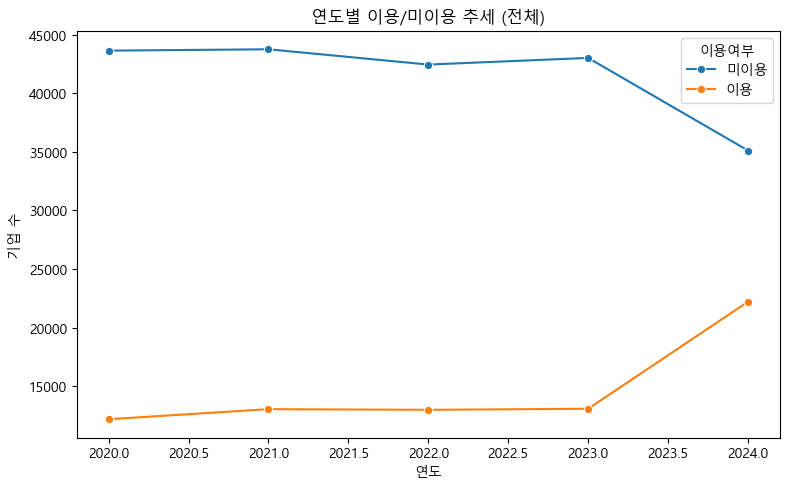

In [363]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import platform

# 💡 한글 폰트 설정
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


# ✅ 1. 전체 연도별 이용/미이용 추세
total_yearly = 이용.groupby('기준연도')[['미이용', '이용']].sum().reset_index()
total_melted = total_yearly.melt(id_vars='기준연도', var_name='이용여부', value_name='건수')

plt.figure(figsize=(8, 5))
sns.lineplot(data=total_melted, x='기준연도', y='건수', hue='이용여부', marker='o')
plt.title('연도별 이용/미이용 추세 (전체)')
plt.xlabel('연도')
plt.ylabel('기업 수')
plt.tight_layout()
plt.show()

In [364]:
import plotly.express as px

# 전체
fig1 = px.line(total_melted, x='기준연도', y='건수', color='이용여부', markers=True,
               title='연도별 이용/미이용 추세 (전체)')
fig1.show()

# 지역별
fig2 = px.line(regional_melted, x='기준연도', y='건수', color='소재지',
               line_dash='이용여부', markers=True,
               title='지역별 연도별 이용/미이용 추세')
fig2.show()


In [ ]:
for region in regions:
    regional_subset = regional_melted[regional_melted['소재지'] == region]

    fig = px.line(regional_subset, x='기준연도', y='건수', color='이용여부', markers=True,
                  title= f'{region} 지역 연도별 무역보험 이용/미이용 추세')
    
    fig.update_layout(width=600, height=400)

    fig.show()

In [365]:
beginner

,기준연도,소재지,사업자등록번호,상호,수출규모(조회연도),이용여부,전년도수출규모,수출초보
0,2020,경기,1138659005,(주)애즈포러스,10만미만,미이용,10만-100만,True
1,2020,경기,3148665871,주식회사 세영테크원,10만미만,미이용,10만미만,True
2,2020,서울,1608801371,와트레이딩 주식회사,10만~100만,미이용,10만미만,True
3,2020,경북,5138205303,경운대학교,10만미만,이용,10만미만,True
4,2020,부산,1068103736,(주)고려차량,10만미만,미이용,10만미만,True
...,...,...,...,...,...,...,...,...
281501,2024,경기,3128188650,(주)디지털프론티어,500만~1천만,이용,70만~100만,True
281502,2024,충북,4438601608,(주)파란이엔지,500만~1천만,이용,10만~30만,True
281503,2024,서울,4558803016,제이원푸드코리아(주),500만~1천만,미이용,10만미만,True
281504,2024,인천,5768801988,주식회사 조히돈트레이딩,500만~1천만,미이용,70만~100만,True


In [ ]:
# regional_subset ; 소재지별 이용여부 이용 건수
# regional_melted ; 전체 합본

,기준연도,소재지,이용여부,건수
80,2020,충북,미이용,199
81,2021,충북,미이용,128
82,2022,충북,미이용,35
83,2023,충북,미이용,107
84,2024,충북,미이용,61
165,2020,충북,이용,886
166,2021,충북,이용,997
167,2022,충북,이용,1051
168,2023,충북,이용,976
169,2024,충북,이용,1089


In [366]:
# 전체 기업수, 초보기업 수, 초보기업 이용수 집계
전체 = filtered.groupby(['기준연도', '소재지']).agg(전체기업수=('사업자등록번호', 'nunique')).reset_index()
초보 = beginner[beginner['수출초보']].groupby(['기준연도', '소재지']).agg(
    초보기업수=('사업자등록번호', 'nunique'),
    초보기업이용건수=('이용여부', lambda x: (x == '이용').sum())
).reset_index()

In [367]:
초보

,기준연도,소재지,초보기업수,초보기업이용건수
0,2020,강원,408,103
1,2020,경기,19036,2328
2,2020,경남,2481,416
3,2020,경북,1697,1502
4,2020,광주,481,82
...,...,...,...,...
80,2024,전남,543,197
81,2024,전북,643,586
82,2024,제주,177,59
83,2024,충남,1388,341


#### 초보기업 이용률 추이

In [368]:
# 병합 + 비율 계산
merged = pd.merge(전체, 초보, on=['기준연도', '소재지'], how='left')
merged['초보기업비율'] = round(merged['초보기업수'] / merged['전체기업수'], 2)
merged['초보기업이용률'] = round(merged['초보기업이용건수'] / merged['초보기업수'], 2)

# 지역별 시각화 + 통계표
regions = merged['소재지'].unique()

In [369]:
merged

,기준연도,소재지,전체기업수,초보기업수,초보기업이용건수,초보기업비율,초보기업이용률
0,2020,강원,530,408,103,0.77,0.25
1,2020,경기,24037,19036,2328,0.79,0.12
2,2020,경남,3521,2481,416,0.70,0.17
3,2020,경북,2402,1697,1502,0.71,0.89
4,2020,광주,629,481,82,0.76,0.17
...,...,...,...,...,...,...,...
80,2024,전남,742,543,197,0.73,0.36
81,2024,전북,870,643,586,0.74,0.91
82,2024,제주,203,177,59,0.87,0.33
83,2024,충남,2051,1388,341,0.68,0.25


In [424]:
merged.to_csv('data/보고서작성용(비율_이용률).csv', encoding='cp949')

In [370]:

for region in regions:
    subset = merged[merged['소재지'] == region]

    # 2. 상세 통계표
    print("=" * 80)
    print(f"📊 {region} 지역 수출초보기업 무역보험 이용 현황")
    print("=" * 80)
    
    # 퍼센트로 변환한 표시용 데이터
    display_subset = subset.copy()
    display_subset['초보기업비율(%)'] = (display_subset['초보기업비율'] * 100).round(2)
    display_subset['초보기업이용률(%)'] = (display_subset['초보기업이용률'] * 100).round(2)
    
    # 주요 컬럼만 선택해서 표시
    display_cols = ['기준연도', '전체기업수', '초보기업수', '초보기업비율(%)', 
                   '초보기업이용건수', '초보기업이용률(%)']
    display(display_subset[display_cols])
    
    # 3. 요약 통계
    print(f"\n🔸 {region} 지역 요약 통계")
    print("-" * 50)
    
    total_firms = display_subset['전체기업수'].sum()
    total_novice = display_subset['초보기업수'].sum()
    total_novice_usage = display_subset['초보기업이용건수'].sum()
    avg_novice_ratio = (total_novice / total_firms * 100).round(2)
    avg_usage_rate = (total_novice_usage / total_novice * 100).round(2)
    
    print(f"  • 전체 기간 총 기업수: {total_firms:,}개사")
    print(f"  • 전체 기간 총 초보기업수: {total_novice:,}개사")
    print(f"  • 전체 기간 초보기업 비율: {avg_novice_ratio}%")
    print(f"  • 전체 기간 초보기업 이용 건수: {total_novice_usage:,}개사")
    print(f"  • 전체 기간 초보기업 이용률: {avg_usage_rate}%")
    
    # 연도별 변화 분석
    if len(display_subset) > 1:
        first_year = display_subset.iloc[0]
        last_year = display_subset.iloc[-1]
        
        usage_change = last_year['초보기업이용률(%)'] - first_year['초보기업이용률(%)']
        ratio_change = last_year['초보기업비율(%)'] - first_year['초보기업비율(%)']
        
        print(f"  • 초보기업 이용률 변화: {usage_change:+.2f}%p ({first_year['기준연도']}년 → {last_year['기준연도']}년)")
        print(f"  • 초보기업 비율 변화: {ratio_change:+.2f}%p ({first_year['기준연도']}년 → {last_year['기준연도']}년)")
    
    print("\n")


📊 강원 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
0,2020,530,408,77.0,103,25.0
17,2021,558,431,77.0,117,27.0
34,2022,583,456,78.0,121,27.0
51,2023,615,474,77.0,123,26.0
68,2024,622,491,79.0,124,25.0



🔸 강원 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 2,908개사
  • 전체 기간 총 초보기업수: 2,260개사
  • 전체 기간 초보기업 비율: 77.72%
  • 전체 기간 초보기업 이용 건수: 588개사
  • 전체 기간 초보기업 이용률: 26.02%
  • 초보기업 이용률 변화: +0.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: +2.00%p (2020년 → 2024년)


📊 경기 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
1,2020,24037,19036,79.0,2328,12.0
18,2021,24379,19443,80.0,2408,12.0
35,2022,24630,19167,78.0,2012,10.0
52,2023,24865,19408,78.0,1997,10.0
69,2024,25424,20015,79.0,9140,46.0



🔸 경기 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 123,335개사
  • 전체 기간 총 초보기업수: 97,069개사
  • 전체 기간 초보기업 비율: 78.7%
  • 전체 기간 초보기업 이용 건수: 17,885개사
  • 전체 기간 초보기업 이용률: 18.43%
  • 초보기업 이용률 변화: +34.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: +0.00%p (2020년 → 2024년)


📊 경남 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
2,2020,3521,2481,70.0,416,17.0
19,2021,3547,2485,70.0,435,18.0
36,2022,3577,2428,68.0,366,15.0
53,2023,3595,2483,69.0,377,15.0
70,2024,3605,2480,69.0,1391,56.0



🔸 경남 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 17,845개사
  • 전체 기간 총 초보기업수: 12,357개사
  • 전체 기간 초보기업 비율: 69.25%
  • 전체 기간 초보기업 이용 건수: 2,985개사
  • 전체 기간 초보기업 이용률: 24.16%
  • 초보기업 이용률 변화: +39.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: -1.00%p (2020년 → 2024년)


📊 경북 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
3,2020,2402,1697,71.0,1502,89.0
20,2021,2467,1783,72.0,1639,92.0
37,2022,2455,1751,71.0,1616,92.0
54,2023,2489,1771,71.0,1683,95.0
71,2024,2492,1794,72.0,1669,93.0



🔸 경북 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 12,305개사
  • 전체 기간 총 초보기업수: 8,796개사
  • 전체 기간 초보기업 비율: 71.48%
  • 전체 기간 초보기업 이용 건수: 8,109개사
  • 전체 기간 초보기업 이용률: 92.19%
  • 초보기업 이용률 변화: +4.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: +1.00%p (2020년 → 2024년)


📊 광주 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
4,2020,629,481,76.0,82,17.0
21,2021,626,473,76.0,92,19.0
38,2022,629,454,72.0,81,18.0
55,2023,635,474,75.0,212,45.0
72,2024,633,485,77.0,225,46.0



🔸 광주 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 3,152개사
  • 전체 기간 총 초보기업수: 2,367개사
  • 전체 기간 초보기업 비율: 75.1%
  • 전체 기간 초보기업 이용 건수: 692개사
  • 전체 기간 초보기업 이용률: 29.24%
  • 초보기업 이용률 변화: +29.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: +1.00%p (2020년 → 2024년)


📊 대구 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
5,2020,2605,2051,79.0,1738,85.0
22,2021,2601,2100,81.0,1936,92.0
39,2022,2600,2010,77.0,1846,92.0
56,2023,2543,1995,78.0,1931,97.0
73,2024,2605,2008,77.0,1887,94.0



🔸 대구 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 12,954개사
  • 전체 기간 총 초보기업수: 10,164개사
  • 전체 기간 초보기업 비율: 78.46%
  • 전체 기간 초보기업 이용 건수: 9,338개사
  • 전체 기간 초보기업 이용률: 91.87%
  • 초보기업 이용률 변화: +9.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: -2.00%p (2020년 → 2024년)


📊 대전 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
6,2020,934,745,80.0,148,20.0
23,2021,993,789,79.0,157,20.0
40,2022,1011,796,79.0,258,32.0
57,2023,990,768,78.0,227,30.0
74,2024,1023,807,79.0,248,31.0



🔸 대전 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 4,951개사
  • 전체 기간 총 초보기업수: 3,905개사
  • 전체 기간 초보기업 비율: 78.87%
  • 전체 기간 초보기업 이용 건수: 1,038개사
  • 전체 기간 초보기업 이용률: 26.58%
  • 초보기업 이용률 변화: +11.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: -1.00%p (2020년 → 2024년)


📊 부산 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
7,2020,4893,3747,77.0,3451,92.0
24,2021,4999,3865,77.0,3442,89.0
41,2022,4904,3729,76.0,2891,78.0
58,2023,4886,3648,75.0,2900,79.0
75,2024,4903,3661,75.0,2942,80.0



🔸 부산 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 24,585개사
  • 전체 기간 총 초보기업수: 18,650개사
  • 전체 기간 초보기업 비율: 75.86%
  • 전체 기간 초보기업 이용 건수: 15,626개사
  • 전체 기간 초보기업 이용률: 83.79%
  • 초보기업 이용률 변화: -12.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: -2.00%p (2020년 → 2024년)


📊 서울 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
8,2020,20871,16814,81.0,1030,6.0
25,2021,20864,16701,80.0,1116,7.0
42,2022,20451,16009,78.0,1070,7.0
59,2023,20240,15992,79.0,1014,6.0
76,2024,20346,16123,79.0,1418,9.0



🔸 서울 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 102,772개사
  • 전체 기간 총 초보기업수: 81,639개사
  • 전체 기간 초보기업 비율: 79.44%
  • 전체 기간 초보기업 이용 건수: 5,648개사
  • 전체 기간 초보기업 이용률: 6.92%
  • 초보기업 이용률 변화: +3.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: -2.00%p (2020년 → 2024년)


📊 세종 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
9,2020,149,108,72.0,16,15.0
26,2021,179,129,72.0,12,9.0
43,2022,189,136,72.0,21,15.0
60,2023,196,132,67.0,24,18.0
77,2024,218,163,75.0,35,21.0



🔸 세종 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 931개사
  • 전체 기간 총 초보기업수: 668개사
  • 전체 기간 초보기업 비율: 71.75%
  • 전체 기간 초보기업 이용 건수: 108개사
  • 전체 기간 초보기업 이용률: 16.17%
  • 초보기업 이용률 변화: +6.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: +3.00%p (2020년 → 2024년)


📊 울산 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
10,2020,758,556,73.0,114,21.0
27,2021,794,573,72.0,101,18.0
44,2022,789,575,73.0,521,91.0
61,2023,814,558,69.0,525,94.0
78,2024,773,551,71.0,518,94.0



🔸 울산 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 3,928개사
  • 전체 기간 총 초보기업수: 2,813개사
  • 전체 기간 초보기업 비율: 71.61%
  • 전체 기간 초보기업 이용 건수: 1,779개사
  • 전체 기간 초보기업 이용률: 63.24%
  • 초보기업 이용률 변화: +73.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: -2.00%p (2020년 → 2024년)


📊 인천 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
11,2020,5312,4217,79.0,250,6.0
28,2021,5447,4347,80.0,268,6.0
45,2022,5591,4381,78.0,257,6.0
62,2023,6037,4754,79.0,255,5.0
79,2024,6356,4853,76.0,376,8.0



🔸 인천 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 28,743개사
  • 전체 기간 총 초보기업수: 22,552개사
  • 전체 기간 초보기업 비율: 78.46%
  • 전체 기간 초보기업 이용 건수: 1,406개사
  • 전체 기간 초보기업 이용률: 6.23%
  • 초보기업 이용률 변화: +2.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: -3.00%p (2020년 → 2024년)


📊 전남 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
12,2020,651,474,73.0,90,19.0
29,2021,662,484,73.0,95,20.0
46,2022,691,494,71.0,116,23.0
63,2023,718,515,72.0,108,21.0
80,2024,742,543,73.0,197,36.0



🔸 전남 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 3,464개사
  • 전체 기간 총 초보기업수: 2,510개사
  • 전체 기간 초보기업 비율: 72.46%
  • 전체 기간 초보기업 이용 건수: 606개사
  • 전체 기간 초보기업 이용률: 24.14%
  • 초보기업 이용률 변화: +17.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: +0.00%p (2020년 → 2024년)


📊 전북 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
13,2020,738,537,73.0,146,27.0
30,2021,787,596,76.0,527,88.0
47,2022,769,540,70.0,495,92.0
64,2023,826,589,71.0,532,90.0
81,2024,870,643,74.0,586,91.0



🔸 전북 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 3,990개사
  • 전체 기간 총 초보기업수: 2,905개사
  • 전체 기간 초보기업 비율: 72.81%
  • 전체 기간 초보기업 이용 건수: 2,286개사
  • 전체 기간 초보기업 이용률: 78.69%
  • 초보기업 이용률 변화: +64.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: +1.00%p (2020년 → 2024년)


📊 제주 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
14,2020,184,157,85.0,141,90.0
31,2021,201,173,86.0,70,40.0
48,2022,176,144,82.0,56,39.0
65,2023,188,164,87.0,60,37.0
82,2024,203,177,87.0,59,33.0



🔸 제주 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 952개사
  • 전체 기간 총 초보기업수: 815개사
  • 전체 기간 초보기업 비율: 85.61%
  • 전체 기간 초보기업 이용 건수: 386개사
  • 전체 기간 초보기업 이용률: 47.36%
  • 초보기업 이용률 변화: -57.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: +2.00%p (2020년 → 2024년)


📊 충남 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
15,2020,1818,1234,68.0,213,17.0
32,2021,1948,1306,67.0,226,17.0
49,2022,1976,1287,65.0,265,21.0
66,2023,2028,1292,64.0,285,22.0
83,2024,2051,1388,68.0,341,25.0



🔸 충남 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 9,821개사
  • 전체 기간 총 초보기업수: 6,507개사
  • 전체 기간 초보기업 비율: 66.26%
  • 전체 기간 초보기업 이용 건수: 1,330개사
  • 전체 기간 초보기업 이용률: 20.44%
  • 초보기업 이용률 변화: +8.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: +0.00%p (2020년 → 2024년)


📊 충북 지역 수출초보기업 무역보험 이용 현황


,기준연도,전체기업수,초보기업수,초보기업비율(%),초보기업이용건수,초보기업이용률(%)
16,2020,1528,1085,71.0,430,40.0
33,2021,1593,1125,71.0,416,37.0
50,2022,1597,1086,68.0,1008,93.0
67,2023,1618,1083,67.0,837,77.0
84,2024,1653,1150,70.0,1064,93.0



🔸 충북 지역 요약 통계
--------------------------------------------------
  • 전체 기간 총 기업수: 7,989개사
  • 전체 기간 총 초보기업수: 5,529개사
  • 전체 기간 초보기업 비율: 69.21%
  • 전체 기간 초보기업 이용 건수: 3,755개사
  • 전체 기간 초보기업 이용률: 67.91%
  • 초보기업 이용률 변화: +53.00%p (2020년 → 2024년)
  • 초보기업 비율 변화: -1.00%p (2020년 → 2024년)




In [ ]:
export_scale_dist.head(1)

수출규모(조회연도)
100만~200만    26690
Name: count, dtype: int64

In [ ]:
# 수출규모별 분포 추가 분석
print("\n" + "=" * 60)
print("📊 수출규모별 기업 분포")
print("=" * 60)
export_scale_dist = filtered['수출규모(조회연도)'].value_counts().sort_index()
print("전체 기업의 수출규모 분포:")
for scale, count in export_scale_dist.items():
    pct = (count / len(df) * 100)
    status = "초보기업" if scale in beginner else "일반기업"
    print(f"  {scale}: {count:,}개사 ({pct}%) - {status}")


📊 수출규모별 기업 분포
전체 기업의 수출규모 분포:
  100만~200만: 26,690개사 (5.4449052700726055%) - 일반기업
  10만~100만: 74,809개사 (15.261443175303919%) - 일반기업
  10만~30만: 25,706개사 (5.2441639142932335%) - 일반기업
  10만미만: 157,843개사 (32.200831118174236%) - 일반기업
  1천만~2천만: 7,354개사 (1.5002560268307958%) - 일반기업
  200만~300만: 4,878개사 (0.995138550296522%) - 일반기업
  200만~500만: 14,803개사 (3.019892570733787%) - 일반기업
  2천만~3천만: 2,835개사 (0.5783554305228864%) - 일반기업
  300만~500만: 4,779개사 (0.9749420114528655%) - 일반기업
  30만~50만: 11,595개사 (2.3654431100221753%) - 일반기업
  3천만~5천만: 2,553개사 (0.5208258956348956%) - 일반기업
  500만~1천만: 12,120개사 (2.4725459675264134%) - 일반기업
  50만~70만: 7,038개사 (1.4357903068853877%) - 일반기업
  5천만초과: 4,862개사 (0.9918744632106784%) - 일반기업
  70만~100만: 6,766개사 (1.380300826426049%) - 일반기업


#### 막대그래프

In [ ]:
import plotly.express as px

for year in years:
    subset = merged[merged['기준연도'] == year]
    fig = px.bar(subset.sort_values('전체이용수', ascending=False), 
                 x='소재지', y='전체이용수',
                 title=f'{year}년 지역별 무역보험 이용 기업 수 (전체)',
                 labels={'전체이용수': '이용 기업 수', '소재지': '지역'})
    fig.update_layout(width=700, height=400)
    fig.show()

In [ ]:
filtered['수출규모(조회연도)'].value_counts()

수출규모(조회연도)
10만미만        157843
10만~100만      74809
100만~200만     26690
10만~30만       25706
200만~500만     14803
500만~1천만      12120
30만~50만       11595
1천만~2천만        7354
50만~70만        7038
70만~100만       6766
200만~300만      4878
5천만초과          4862
300만~500만      4779
2천만~3천만        2835
3천만~5천만        2553
Name: count, dtype: int64

#### 초보기업 비율

In [ ]:
filtered['수출초보'].replace({
    True: '수출초보기업',
    False: '수출성장형기업'
})

In [ ]:
for year in range(2020, 2025):
    uu = filtered.copy()
    uu['수출초보'] = filtered['수출초보'].replace({
        True: '수출초보기업',
        False: '수출성장형기업'
    })
    df_year = uu[uu['기준연도'] == year]
    
    category_summary_y = df_year.groupby('수출초보').agg({
        '사업자등록번호': 'nunique',
        '이용여부': lambda x: (x == '이용').sum()
    }).reset_index()
    category_summary_y.columns = ['수출초보', '기업수', '이용기업수']
    category_summary_y['이용률(%)'] = (category_summary_y['이용기업수'] / category_summary_y['기업수'] * 100).round(2)

    display(f"📆 {year}년 요약")
    display(category_summary_y)

    fig = px.pie(category_summary_y, values='기업수', names='수출초보', 
                 title=f'{year}년 수출초보기업 vs 일반기업 비율',
                 hole=0.4,
                 color_discrete_map={'수출초보기업': '#FF6B6B', '일반기업': '#4ECDC4'})
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(height=450)
    fig.show()


'📆 2020년 요약'

,수출초보,기업수,이용기업수,이용률(%)
0,수출성장형기업,15732,8707,55.35
1,수출초보기업,55828,20404,36.55


'📆 2021년 요약'

,수출초보,기업수,이용기업수,이용률(%)
0,수출성장형기업,15842,8606,54.32
1,수출초보기업,56803,21996,38.72


'📆 2022년 요약'

,수출초보,기업수,이용기업수,이용률(%)
0,수출성장형기업,17175,9484,55.22
1,수출초보기업,55443,22021,39.72


'📆 2023년 요약'

,수출초보,기업수,이용기업수,이용률(%)
0,수출성장형기업,17183,9538,55.51
1,수출초보기업,56100,22694,40.45


'📆 2024년 요약'

,수출초보,기업수,이용기업수,이용률(%)
0,수출성장형기업,17187,9563,55.64
1,수출초보기업,57332,23853,41.61


In [ ]:
for year in range(2020, 2025):
    df_year = filtered[filtered['기준연도'] == year]
    
    regional_summary_y = df_year.groupby(['소재지', '수출초보']).agg({
        '사업자등록번호': 'nunique'
    }).reset_index()
    regional_summary_y.columns = ['소재지', '수출초보', '기업수']
    print(regional_summary_y)
    regional_pivot_y = regional_summary_y.pivot(index='소재지', columns='수출초보', values='기업수').fillna(0)
    regional_pivot_y['총기업수'] = regional_pivot_y.sum(axis=1)
    regional_pivot_y['초보기업비율(%)'] = (regional_pivot_y[True] / regional_pivot_y['총기업수'] * 100).round(2)
    regional_pivot_y = regional_pivot_y.sort_values('초보기업비율(%)', ascending=False)

    display(f"📆 {year}년 지역별 초보기업 비율")
    display(regional_pivot_y)

    fig = px.bar(regional_pivot_y.reset_index(), x='소재지', y='초보기업비율(%)',
                 title=f'{year}년 지역별 초보기업 비율',
                 color='초보기업비율(%)',
                 color_continuous_scale='Reds')
    fig.update_layout(height=450, xaxis_tickangle=-45)
    fig.show()

   소재지   수출초보    기업수
0   강원  False    122
1   강원   True    408
2   경기  False   5001
3   경기   True  19036
4   경남  False   1040
5   경남   True   2481
6   경북  False    705
7   경북   True   1697
8   광주  False    148
9   광주   True    481
10  대구  False    554
11  대구   True   2051
12  대전  False    189
13  대전   True    745
14  부산  False   1146
15  부산   True   3747
16  서울  False   4057
17  서울   True  16814
18  세종  False     41
19  세종   True    108
20  울산  False    202
21  울산   True    556
22  인천  False   1095
23  인천   True   4217
24  전남  False    177
25  전남   True    474
26  전북  False    201
27  전북   True    537
28  제주  False     27
29  제주   True    157
30  충남  False    584
31  충남   True   1234
32  충북  False    443
33  충북   True   1085


'📆 2020년 지역별 초보기업 비율'

수출초보,False,True,총기업수,초보기업비율(%)
소재지,,,,
제주,27,157,184,85.33
서울,4057,16814,20871,80.56
대전,189,745,934,79.76
인천,1095,4217,5312,79.39
경기,5001,19036,24037,79.19
대구,554,2051,2605,78.73
강원,122,408,530,76.98
부산,1146,3747,4893,76.58
광주,148,481,629,76.47


   소재지   수출초보    기업수
0   강원  False    127
1   강원   True    431
2   경기  False   4936
3   경기   True  19443
4   경남  False   1062
5   경남   True   2485
6   경북  False    684
7   경북   True   1783
8   광주  False    153
9   광주   True    473
10  대구  False    501
11  대구   True   2100
12  대전  False    204
13  대전   True    789
14  부산  False   1134
15  부산   True   3865
16  서울  False   4163
17  서울   True  16701
18  세종  False     50
19  세종   True    129
20  울산  False    221
21  울산   True    573
22  인천  False   1100
23  인천   True   4347
24  전남  False    178
25  전남   True    484
26  전북  False    191
27  전북   True    596
28  제주  False     28
29  제주   True    173
30  충남  False    642
31  충남   True   1306
32  충북  False    468
33  충북   True   1125


'📆 2021년 지역별 초보기업 비율'

수출초보,False,True,총기업수,초보기업비율(%)
소재지,,,,
제주,28,173,201,86.07
대구,501,2100,2601,80.74
서울,4163,16701,20864,80.05
인천,1100,4347,5447,79.81
경기,4936,19443,24379,79.75
대전,204,789,993,79.46
부산,1134,3865,4999,77.32
강원,127,431,558,77.24
전북,191,596,787,75.73


   소재지   수출초보    기업수
0   강원  False    127
1   강원   True    456
2   경기  False   5463
3   경기   True  19167
4   경남  False   1149
5   경남   True   2428
6   경북  False    704
7   경북   True   1751
8   광주  False    175
9   광주   True    454
10  대구  False    590
11  대구   True   2010
12  대전  False    215
13  대전   True    796
14  부산  False   1175
15  부산   True   3729
16  서울  False   4442
17  서울   True  16009
18  세종  False     53
19  세종   True    136
20  울산  False    214
21  울산   True    575
22  인천  False   1210
23  인천   True   4381
24  전남  False    197
25  전남   True    494
26  전북  False    229
27  전북   True    540
28  제주  False     32
29  제주   True    144
30  충남  False    689
31  충남   True   1287
32  충북  False    511
33  충북   True   1086


'📆 2022년 지역별 초보기업 비율'

수출초보,False,True,총기업수,초보기업비율(%)
소재지,,,,
제주,32,144,176,81.82
대전,215,796,1011,78.73
인천,1210,4381,5591,78.36
서울,4442,16009,20451,78.28
강원,127,456,583,78.22
경기,5463,19167,24630,77.82
대구,590,2010,2600,77.31
부산,1175,3729,4904,76.04
울산,214,575,789,72.88


   소재지   수출초보    기업수
0   강원  False    141
1   강원   True    474
2   경기  False   5457
3   경기   True  19408
4   경남  False   1112
5   경남   True   2483
6   경북  False    718
7   경북   True   1771
8   광주  False    161
9   광주   True    474
10  대구  False    548
11  대구   True   1995
12  대전  False    222
13  대전   True    768
14  부산  False   1238
15  부산   True   3648
16  서울  False   4248
17  서울   True  15992
18  세종  False     64
19  세종   True    132
20  울산  False    256
21  울산   True    558
22  인천  False   1283
23  인천   True   4754
24  전남  False    203
25  전남   True    515
26  전북  False    237
27  전북   True    589
28  제주  False     24
29  제주   True    164
30  충남  False    736
31  충남   True   1292
32  충북  False    535
33  충북   True   1083


'📆 2023년 지역별 초보기업 비율'

수출초보,False,True,총기업수,초보기업비율(%)
소재지,,,,
제주,24,164,188,87.23
서울,4248,15992,20240,79.01
인천,1283,4754,6037,78.75
대구,548,1995,2543,78.45
경기,5457,19408,24865,78.05
대전,222,768,990,77.58
강원,141,474,615,77.07
부산,1238,3648,4886,74.66
광주,161,474,635,74.65


   소재지   수출초보    기업수
0   강원  False    131
1   강원   True    491
2   경기  False   5409
3   경기   True  20015
4   경남  False   1125
5   경남   True   2480
6   경북  False    698
7   경북   True   1794
8   광주  False    148
9   광주   True    485
10  대구  False    597
11  대구   True   2008
12  대전  False    216
13  대전   True    807
14  부산  False   1242
15  부산   True   3661
16  서울  False   4223
17  서울   True  16123
18  세종  False     55
19  세종   True    163
20  울산  False    222
21  울산   True    551
22  인천  False   1503
23  인천   True   4853
24  전남  False    199
25  전남   True    543
26  전북  False    227
27  전북   True    643
28  제주  False     26
29  제주   True    177
30  충남  False    663
31  충남   True   1388
32  충북  False    503
33  충북   True   1150


'📆 2024년 지역별 초보기업 비율'

수출초보,False,True,총기업수,초보기업비율(%)
소재지,,,,
제주,26,177,203,87.19
서울,4223,16123,20346,79.24
강원,131,491,622,78.94
대전,216,807,1023,78.89
경기,5409,20015,25424,78.72
대구,597,2008,2605,77.08
광주,148,485,633,76.62
인천,1503,4853,6356,76.35
세종,55,163,218,74.77


In [419]:
# 방법 1: 기존 코드 수정하여 한 번에 저장
import pandas as pd

# 결과를 저장할 리스트
results = []

for year in range(2020, 2025):
    df_year = filtered[filtered['기준연도'] == year]
    
    regional_summary_y = df_year.groupby(['소재지', '수출초보']).agg({
        '사업자등록번호': 'nunique'
    }).reset_index()
    regional_summary_y.columns = ['소재지', '수출초보', '기업수']
    
    regional_pivot_y = regional_summary_y.pivot(index='소재지', columns='수출초보', values='기업수').fillna(0)
    regional_pivot_y['총기업수'] = regional_pivot_y.sum(axis=1)
    regional_pivot_y['초보기업비율(%)'] = (regional_pivot_y[True] / regional_pivot_y['총기업수'] * 100).round(2)
    
    # 연도와 지역별 초보기업 비율만 추출
    for region in regional_pivot_y.index:
        results.append({
            '연도': year,
            '지역': region,
            '초보기업비율(%)': regional_pivot_y.loc[region, '초보기업비율(%)']
        })

# DataFrame으로 변환
result_df = pd.DataFrame(results)

# CSV로 저장
result_df.to_csv('연도별_지역별_초보기업비율.csv', index=False, encoding='utf-8-sig')

print("CSV 파일이 저장되었습니다!")
print("\n미리보기:")
print(result_df.head(10))

# ============================================================
# 방법 2: 기존 코드를 그대로 두고 별도로 실행하는 버전
# ============================================================

def export_beginner_ratio_to_csv(filtered_data):
    """
    연도별 지역별 초보기업 비율을 CSV로 저장하는 함수
    """
    results = []
    
    for year in range(2020, 2025):
        df_year = filtered_data[filtered_data['기준연도'] == year]
        
        if df_year.empty:
            continue
            
        regional_summary_y = df_year.groupby(['소재지', '수출초보']).agg({
            '사업자등록번호': 'nunique'
        }).reset_index()
        regional_summary_y.columns = ['소재지', '수출초보', '기업수']
        
        regional_pivot_y = regional_summary_y.pivot(index='소재지', columns='수출초보', values='기업수').fillna(0)
        regional_pivot_y['총기업수'] = regional_pivot_y.sum(axis=1)
        regional_pivot_y['초보기업비율(%)'] = (regional_pivot_y[True] / regional_pivot_y['총기업수'] * 100).round(2)
        
        # 연도와 지역별 초보기업 비율만 추출
        for region in regional_pivot_y.index:
            results.append({
                '연도': year,
                '지역': region,
                '초보기업비율(%)': regional_pivot_y.loc[region, '초보기업비율(%)']
            })
    
    # DataFrame으로 변환
    result_df = pd.DataFrame(results)
    
    # CSV로 저장
    filename = '연도별_지역별_초보기업비율.csv'
    result_df.to_csv(filename, index=False, encoding='utf-8-sig')
    
    return result_df, filename

CSV 파일이 저장되었습니다!

미리보기:
     연도  지역  초보기업비율(%)
0  2020  강원      76.98
1  2020  경기      79.19
2  2020  경남      70.46
3  2020  경북      70.65
4  2020  광주      76.47
5  2020  대구      78.73
6  2020  대전      79.76
7  2020  부산      76.58
8  2020  서울      80.56
9  2020  세종      72.48


In [371]:
years = sorted(merged['기준연도'].unique())

In [372]:
#### 초보기업 이용률
for year in range(2020, 2025):
    df_year = filtered[filtered['기준연도'] == year]
    novice_df_y = df_year[df_year['수출초보'] == True]
    
    novice_regional_y = novice_df_y.groupby('소재지').agg({
        '사업자등록번호': 'nunique',
        '이용여부': lambda x: (x == '이용').sum()
    }).reset_index()
    novice_regional_y.columns = ['소재지', '초보기업수', '이용기업수']
    novice_regional_y['이용률(%)'] = (novice_regional_y['이용기업수'] / novice_regional_y['초보기업수'] * 100).round(2)
    novice_regional_y = novice_regional_y.sort_values('이용률(%)', ascending=False)

    display(f"📆 {year}년 초보기업 이용률")
    display(novice_regional_y)

    fig = px.bar(novice_regional_y, x='소재지', y='이용률(%)',
                 title=f'{year}년 지역별 초보기업 무역보험 이용률',
                 color='이용률(%)',
                 color_continuous_scale='Blues',
                 text='이용률(%)')
    fig.update_traces(texttemplate='%{text}%', textposition='outside')
    fig.update_layout(height=450, xaxis_tickangle=-45)
    fig.show()


'📆 2020년 초보기업 이용률'

,소재지,초보기업수,이용기업수,이용률(%)
7,부산,3747,3451,92.10
14,제주,157,141,89.81
3,경북,1697,1502,88.51
5,대구,2051,1738,84.74
16,충북,1085,430,39.63
13,전북,537,146,27.19
0,강원,408,103,25.25
10,울산,556,114,20.50
6,대전,745,148,19.87
12,전남,474,90,18.99


'📆 2021년 초보기업 이용률'

,소재지,초보기업수,이용기업수,이용률(%)
5,대구,2100,1936,92.19
3,경북,1783,1639,91.92
7,부산,3865,3442,89.06
13,전북,596,527,88.42
14,제주,173,70,40.46
16,충북,1125,416,36.98
0,강원,431,117,27.15
6,대전,789,157,19.90
12,전남,484,95,19.63
4,광주,473,92,19.45


'📆 2022년 초보기업 이용률'

,소재지,초보기업수,이용기업수,이용률(%)
16,충북,1086,1008,92.82
3,경북,1751,1616,92.29
5,대구,2010,1846,91.84
13,전북,540,495,91.67
10,울산,575,521,90.61
7,부산,3729,2891,77.53
14,제주,144,56,38.89
6,대전,796,258,32.41
0,강원,456,121,26.54
12,전남,494,116,23.48


'📆 2023년 초보기업 이용률'

,소재지,초보기업수,이용기업수,이용률(%)
5,대구,1995,1931,96.79
3,경북,1771,1683,95.03
10,울산,558,525,94.09
13,전북,589,532,90.32
7,부산,3648,2900,79.50
16,충북,1083,837,77.29
4,광주,474,212,44.73
14,제주,164,60,36.59
6,대전,768,227,29.56
0,강원,474,123,25.95


'📆 2024년 초보기업 이용률'

,소재지,초보기업수,이용기업수,이용률(%)
10,울산,551,518,94.01
5,대구,2008,1887,93.97
3,경북,1794,1669,93.03
16,충북,1150,1064,92.52
13,전북,643,586,91.14
7,부산,3661,2942,80.36
2,경남,2480,1391,56.09
4,광주,485,225,46.39
1,경기,20015,9140,45.67
12,전남,543,197,36.28


### 인수실적

In [ ]:
ds.head(1)

,기업규모,사업자등록번호,보험종목,보험세부종목,인수건수,원화보험금액,원화인수보험료,단체원화보험금액,유효계약건수,원화유효보험금액,유효계약보험료,기준연도,소재지
0,대기업,1148116585,수입보험,수입보험(금융기관용),13,3.377044e+11,103103440.0,0,4.0,1.170119e+11,40061360.0,2024,서울


In [373]:
ds = ds[['기준연도', '소재지', '사업자등록번호', '기업규모', '보험종목', '보험세부종목', '인수건수', '원화보험금액',	'원화인수보험료', '단체원화보험금액', '유효계약건수', '원화유효보험금액', '유효계약보험료']]

In [374]:
beginner[beginner['이용여부'] == '이용'].shape, ds.shape

((73565, 8), (145847, 13))

In [ ]:
ds['소재지'].info()

<class 'pandas.core.series.Series'>
Index: 145847 entries, 0 to 145846
Series name: 소재지
Non-Null Count   Dtype 
--------------   ----- 
145847 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB


In [375]:
beginner_이용 = beginner[beginner['이용여부'] == '이용']

In [376]:
beginner_이용.shape

(73565, 8)

In [377]:
beginner_이용.merge(ds, on=['기준연도', '소재지', '사업자등록번호'], how='left')['보험종목'].value_counts()

보험종목
단기수출보험          76669
수출신용보증 선적전       8145
환변동 선물환           340
수출신용보증 선적후        258
수출신용보증(포괄매입)      239
수입보험              111
수출신용보증(매입)         42
Name: count, dtype: int64

In [378]:
mm = beginner_이용.merge(ds, on=['기준연도', '소재지', '사업자등록번호'], how='left')

In [379]:
# (85804, 19) 보험종목이 4종에 속하는 df
mm[~mm['보험종목'].isna()].groupby('기준연도').사업자등록번호.nunique()

기준연도
2020    12198
2021    13057
2022    13000
2023    13090
2024    22220
Name: 사업자등록번호, dtype: int64

In [380]:
mm.shape

(85804, 18)

In [288]:
(123207-85804)/123207

0.30357853044064054

In [381]:
mm.sample(3)


,기준연도,소재지,사업자등록번호,상호,수출규모(조회연도),이용여부,전년도수출규모,수출초보,기업규모,보험종목,보험세부종목,인수건수,원화보험금액,원화인수보험료,단체원화보험금액,유효계약건수,원화유효보험금액,유효계약보험료
72081,2024,서울,1058795026,그린캠텍(주),10만미만,이용,10만~30만,True,중소기업,단기수출보험,단기수출보험(플러스보험),12,165304000.0,277080.0,"165,304,000",1.0,69270000.0,277080.0
14571,2021,서울,2108148269,세린화이버(주),10만~100만,이용,10만~100만,True,중소기업,단기수출보험,단기수출보험(플러스보험),12,819346000.0,221480.0,"819,346,000",1.0,55370000.0,221480.0
71874,2024,경북,2761700774,리틀스푼,10만~30만,이용,10만~30만,True,중소기업,단기수출보험,단기수출보험(플러스보험),12,150750000.0,82790.0,"150,750,000",1.0,41397000.0,82790.0


#### 보험종목통합

| 항목                | 건수    |
|---------------------|--------|
| 단기수출보험         | 76,669 |
| 수출신용보증 선적전    | 8,145  |
| 환변동 선물환        | 340    |
| 수출신용보증 선적후    | 258    |
| 수출신용보증(포괄매입) | 239    |
| 수입보험             | 111    |
| 수출신용보증(매입)     | 42     |

In [390]:
mm.loc[mm['보험종목'].str.contains('수출신용보증', na=False), '보험종목'] = '수출신용보증'
mm['보험종목'].value_counts()

보험종목
단기수출보험     76669
수출신용보증      8684
환변동 선물환      340
수입보험         111
Name: count, dtype: int64

In [383]:
mm['보험세부종목'].value_counts()

보험세부종목
단기수출보험(플러스보험)       75458
수출신용보증(선적전)          8145
단기수출보험(일반수출)          782
환변동보험(수출선물환)          327
수출신용보증(선적후)           257
수출신용보증(포괄매입)          239
단기수출보험(농수산물패키지)       221
단기수출보험(위탁가공무역)        117
수입보험(금융기관용)            66
단기수출보험(중계무역)           55
수출신용보증(매입)             42
수입보험(글로벌공급망)           42
단기수출보험(다이렉트-선적후)       29
환변동보험(수입선물환)           13
단기수출보험(재판매)             5
수입보험(수입자용)              3
단기수출보험(본지사금융)           1
단기수출보험(포페이팅)            1
수출신용보증(Nego)            1
Name: count, dtype: int64

In [384]:
mm['이용여부'].value_counts()

이용여부
이용    85804
Name: count, dtype: int64

In [310]:
# 37403
mm['보험종목'].fillna('기타 종목', inplace=True)

In [391]:
ds[ds['사업자등록번호'] == 1608801371]

,기준연도,소재지,사업자등록번호,기업규모,보험종목,보험세부종목,인수건수,원화보험금액,원화인수보험료,단체원화보험금액,유효계약건수,원화유효보험금액,유효계약보험료
26062,2024,서울,1608801371,중소기업,단기수출보험,단기수출보험(플러스보험),12,97540000.0,277080.0,"97,540,000",1.0,69270000.0,277080.0
26063,2024,서울,1608801371,중소기업,수출신용보증 선적전,수출신용보증(선적전),1,31500000.0,348070.0,0,0.0,0.0,0.0
58811,2023,서울,1608801371,중소기업,단기수출보험,단기수출보험(플러스보험),12,70943000.0,256760.0,"70,943,000",1.0,64190000.0,256760.0
58812,2023,서울,1608801371,중소기업,수출신용보증 선적전,수출신용보증(선적전),1,31500000.0,268380.0,0,1.0,31500000.0,449500.0
84993,2022,서울,1608801371,중소기업,단기수출보험,단기수출보험(플러스보험),5,31570000.0,259720.0,"31,570,000",1.0,64930000.0,259720.0
84994,2022,서울,1608801371,중소기업,수출신용보증 선적전,수출신용보증(선적전),1,31500000.0,181120.0,0,1.0,31500000.0,181120.0


In [392]:
mm['기준연도'].value_counts()

기준연도
2024    27996
2021    14863
2023    14644
2022    14461
2020    13840
Name: count, dtype: int64

In [393]:
yearly_totals

,기준연도,연도별_전체기업수
0,2020,12198
1,2021,13057
2,2022,13000
3,2023,13090
4,2024,22220


In [394]:
# 보험종목별, 연도별 이용 기업 수
insurance_usage = mm.groupby(['기준연도', '보험종목'])['사업자등록번호'].nunique().reset_index()
insurance_usage.columns = ['기준연도', '보험종목', '이용기업수']

# 연도별 전체 기업 수와 매칭하여 이용률 계산
yearly_totals = mm.groupby('기준연도')['사업자등록번호'].nunique().reset_index()
yearly_totals.columns = ['기준연도', '연도별_전체기업수']

insurance_usage = insurance_usage.merge(yearly_totals, on='기준연도')
insurance_usage['이용률(%)'] = (insurance_usage['이용기업수'] / insurance_usage['연도별_전체기업수'] * 100).round(2)

# 정렬
insurance_usage = insurance_usage.sort_values(['기준연도', '이용률(%)'], ascending=[True, False])
display(insurance_usage)

,기준연도,보험종목,이용기업수,연도별_전체기업수,이용률(%)
0,2020,단기수출보험,11750,12198,96.33
2,2020,수출신용보증,1591,12198,13.04
3,2020,환변동 선물환,72,12198,0.59
1,2020,수입보험,18,12198,0.15
4,2021,단기수출보험,12597,13057,96.48
6,2021,수출신용보증,1745,13057,13.36
7,2021,환변동 선물환,48,13057,0.37
5,2021,수입보험,22,13057,0.17
8,2022,단기수출보험,12503,13000,96.18
10,2022,수출신용보증,1617,13000,12.44


In [395]:
import plotly.express as px

years = sorted(insurance_usage['기준연도'].unique())

for year in years:
    df_year = insurance_usage[insurance_usage['기준연도'] == year]
    
    fig = px.bar(df_year, 
                 x='이용률(%)', y='보험종목', 
                 orientation='h', 
                 text='이용률(%)',
                 title=f'📊 {year}년 보험종목별 이용률',
                 color='보험종목',  # 색상 구분 추가 (선택)
                 color_discrete_sequence=px.colors.qualitative.D3)
    
    fig.update_traces(textposition='outside')
    fig.update_layout(xaxis_title='이용률 (%)', yaxis_title='보험종목', height=500)
    fig.show()